

# Imbalanced Classification Assessment - Umnai // Olayinka
#### Copyright 2023 Olayinka Peter Oluwafemi.

---



---


The steps in this notebook are as follows:


1.   Install & import necessary libraries.
2.   Cleaning our data
4.   Pre-processing
5.   Normalization
6.   Building the model: Logistic Regression with Keras
7.   Train the model
8.   Evaluate the model  
9.   Run predictions on validation data  
10.   Deployment




<br>

---



---


## First, let us install and import necessary libraries

In [1]:
# Use seaborn for pairplot
!pip install seaborn
# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# machine learning libraries & helpers
import tensorflow as tf
from tensorflow import keras

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

print(tf.__version__)

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-hsitzosj
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-hsitzosj
  Resolved https://github.com/tensorflow/docs to commit 77b51f822f16a7527a0159b8ec3683759aa229d3
  Preparing metadata (setup.py) ... done
2.12.0


In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- No null values.
- No non-numeric variable.

# Cleaning our data


In [6]:
# Checking number of datapoints available for each class.

dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Value counts show that target variable- Class, is imbalanced.
To address this- oversampling the minority class- because undersampling will leave us with less datapoints. Dataset does not appear too large to need reduction.

Handling class inbalance

In [7]:
# Before oversampling, spliting the dataset into train and test.

train_data = dataset.sample(frac=0.8, random_state=0)  # 80% train, 20% test
test_data = dataset.drop(train_data.index)

In [8]:
# The minority class will be oversampled and concatenated back to the majority class.

# save the count for the majority and minority class in their variables and use it to subset the dataset

majority_class_count, minority_class_count = train_data.Class.value_counts()

majority_train = train_data[train_data.Class == 0]
minority_train = train_data[train_data.Class == 1]

In [9]:
# now, oversampling the minority class

oversampled_minority = minority_train.sample(majority_class_count, replace= True)

In [10]:
oversampled_minority.shape

(227455, 31)

In [11]:
# adding the oversampled minority to the majority class data

new_train = pd.concat([oversampled_minority, majority_train], axis = 0)

In [12]:
new_train.shape

(454910, 31)

## Scaling the data- scaling techinique will be normalization- min_max in this case


# Normalization

Normalization is a process of transforming data into a common scale. This is done to ensure that all features are treated equally when performing machine learning algorithms. Without normalization, features with larger values would have a greater impact on the model than features with smaller values.

There are several reasons why normalization is important. First, it can help to improve the performance of machine learning algorithms. By normalizing the data, we can reduce the impact of outliers and make the model more robust to noise. Second, normalization can help to speed up the training process. By reducing the range of values, the model can be trained more quickly. Finally, normalization can help to improve the interpretability of the model. By normalizing the data, we can make it easier to understand how the model is making predictions.


In [13]:
# before scaling, separating feature from target variable

X_train, y_train = new_train.drop("Class", axis= 1), new_train.Class

In [14]:
# function for scaling

def min_max_scale(x):
    min_val = x.min()
    max_val = x.max()
    scaled_x = (x - min_val) / (max_val - min_val)
    return scaled_x

X_train = min_max_scale(X_train)

In [15]:
X_test, y_test = test_data.drop("Class", axis= 1), test_data.Class

# Building the model: Logistic Regression with Keras

A logistic regression neural network is a type of artificial neural network that is used for classification problems. It is a linear model that uses the logistic function to map the input data to the output data. The logistic function is a sigmoid function that is used to map the real-valued input data to the probability of a binary output.

Logistic regression neural networks are often used for binary classification problems, but they can also be used for multi-class classification problems. To use a logistic regression neural network for a multi-class classification problem, the output layer of the network is typically replaced with a softmax layer. The softmax layer is a type of activation function that is used to map the output of the network to a probability distribution over the possible output classes.

Logistic regression neural networks are relatively simple to train and they can achieve good performance on a variety of classification problems. However, they can be sensitive to overfitting, and they can be difficult to interpret.





### Here, I use a `Sequential` model with a single inner dense layer, the sigmoid activation function, and a unit that returns a classified value: either 0 or 1.

In [21]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=[len(X_train.keys())])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae', 'mse'])
  return model

In [22]:
model = build_model()

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [24]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 73ms/step


array([[0.5685751 ],
       [0.60950315],
       [0.5695138 ],
       [0.54021376],
       [0.5962825 ],
       [0.62693316],
       [0.59765446],
       [0.65279925],
       [0.5747284 ],
       [0.574634  ]], dtype=float32)

## Train the model

I now train the model for 50 epochs, and record the training and validation accuracy in the `history` object.

In [25]:
EPOCHS = 50

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/50
11372/11373 [============================>.] - ETA: 0s - loss: 0.3306 - mae: 0.2526 - mse: 0.1002
Epoch: 0, loss:0.3305,  mae:0.2526,  mse:0.1002,  val_loss:0.2752,  val_mae:0.2350,  val_mse:0.0619,  
11373/11373 [==============================] - 36s 3ms/step - loss: 0.3305 - mae: 0.2526 - mse: 0.1002 - val_loss: 0.2752 - val_mae: 0.2350 - val_mse: 0.0619
Epoch 2/50
11373/11373 [==============================] - 25s 2ms/step - loss: 0.2253 - mae: 0.1655 - mse: 0.0660 - val_loss: 0.2609 - val_mae: 0.2181 - val_mse: 0.0603
Epoch 3/50
11373/11373 [==============================] - 25s 2ms/step - loss: 0.2034 - mae: 0.1451 - mse: 0.0599 - val_loss: 0.2053 - val_mae: 0.1726 - val_mse: 0.0436
Epoch 4/50
11373/11373 [==============================] - 25s 2ms/step - loss: 0.1930 - mae: 0.1349 - mse: 0.0570 - val_loss: 0.2266 - val_mae: 0.1847 - val_mse: 0.0523
Epoch 5/50
11373/11373 [==============================] - 26s 2ms/step - loss: 0.1867 - mae: 0.1286 - mse: 0.0553 - val_los

<br>

<br>

<br>

# Evaluate the model

Model evaluation is the process of assessing the performance of a machine learning model. It is important to evaluate models to ensure that they are working as intended and to identify any potential problems. There are a number of different types of model evaluation metrics, which can be used to assess different aspects of model performance.




First, let's visualize the model's training progress using the stats stored in the `history` object.

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
45,0.156830,0.098774,0.046924,0.190769,0.139417,0.045702,45
46,0.156690,0.098640,0.046890,0.182162,0.133498,0.043055,46
47,0.156588,0.098523,0.046865,0.177525,0.130251,0.041650,47
48,0.156438,0.098366,0.046821,0.178362,0.130717,0.041922,48
49,0.156329,0.098258,0.046785,0.165103,0.121563,0.037936,49


In [27]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'Mean Average Error [Default]')

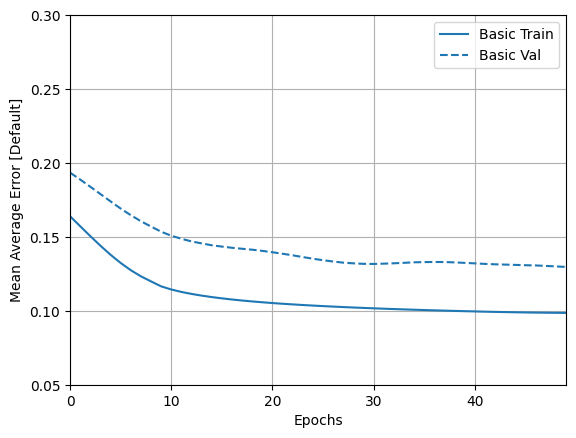

In [28]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0.05, 0.3])
plt.ylabel('Mean Average Error [Default]')

## Evaluating the model after training to get the loss statistics

In [29]:
model.evaluate(X_test, y_test)

1781/1781 [==============================] - 3s 2ms/step - loss: 636.9788 - mae: 0.0554 - mse: 0.0554


[636.9788208007812, 0.05544343218207359, 0.05544039607048035]

Evaluation returns fairly reliable loss scores for all the error functions:

- Loss
- Mean Average Error
- Mean Squared Error

with MSE seeming the best for now.

<br>

# Run predictions on validation data

In [30]:
example_batch = X_test[5:6]

example_result = model.predict(example_batch)
print(example_result)

1/1 [==============================] - 0s 34ms/step
[[1.]]


In [31]:
test_predictions = model.predict(X_test).flatten()
test_predictions = [0 if val < 0.5 else 1 for val in test_predictions]

1781/1781 [==============================] - 2s 1ms/step


In [32]:
test_predictions

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,


#### I append the predicted labels to the initial table to compare the results.

#### Scroll to right end of table to see test_predictions.

In [33]:
final_test_data = X_test
final_test_data['test_labels'] = y_test
final_test_data['test_predictions'] = test_predictions

final_test_data.tail(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,test_labels,test_predictions
284675,172672.0,-0.366165,0.799378,-0.013567,0.711752,1.278934,-1.006326,0.806989,-0.070481,-0.809597,...,1.200886,-0.166573,-0.081755,-0.434108,-0.490443,0.230615,0.245115,15.00,0,0
284682,172675.0,-0.392415,-0.305784,-0.952098,-0.370059,2.158886,-2.876540,0.992906,-0.574800,-0.679477,...,1.059497,-0.112435,0.579424,0.471197,0.862335,-0.201799,-0.086905,2.00,0,0
284683,172676.0,1.915474,-0.217019,-0.521731,1.274430,-0.124715,0.351640,-0.502276,0.170470,0.773668,...,1.013752,0.060780,0.726831,0.154690,-0.480588,0.047439,-0.042786,5.90,0,0
284689,172685.0,1.834000,-0.736090,-0.483201,0.127392,-0.058900,1.492237,-1.074432,0.615661,1.160177,...,1.014347,0.198022,-1.467513,-0.514582,0.677574,0.023794,-0.074306,11.50,0,0
284693,172688.0,-0.973245,0.365459,0.544881,-0.018750,0.823960,-1.830569,1.632718,-0.263931,-0.343031,...,0.353157,0.037998,0.798246,0.261837,-0.820848,0.052709,0.161392,89.90,0,0
284695,172691.0,-3.129647,3.154269,-2.131756,-1.406694,-0.255714,-0.465659,-0.038440,1.152033,1.266457,...,-0.861127,0.134934,-1.135408,0.196247,0.209139,0.736433,0.325485,8.96,0,0
284700,172695.0,2.045873,-1.206968,0.748907,-0.524482,-2.295783,-0.930936,-1.649167,0.030429,0.622710,...,1.476746,0.307058,0.958799,-0.549334,-0.147997,0.055248,-0.022282,12.50,0,0
284705,172700.0,1.661170,-0.776159,-0.641425,0.373346,-0.503214,-0.187082,-0.217116,-0.029741,0.842554,...,-0.490798,0.179927,-0.428102,-0.448987,-0.678428,0.000639,-0.015738,169.29,0,0
284710,172703.0,2.141611,-0.969139,-0.652944,-0.902773,-0.821081,-0.264356,-0.970697,-0.087421,-0.008249,...,1.032939,0.136960,0.665397,-0.104844,-0.115775,0.011380,-0.037789,29.00,0,0
284721,172710.0,-2.516013,2.481932,-0.683786,-0.621718,0.596987,-1.384147,1.579089,-1.314013,1.618929,...,1.314473,-0.176766,0.356307,-0.516441,-0.450529,-1.984913,-0.222766,7.45,0,0


### It doesn't look perfect. And there are a fair number of false positives. But there is absolutely room for improvement

### Let's take a look at the error distribution.


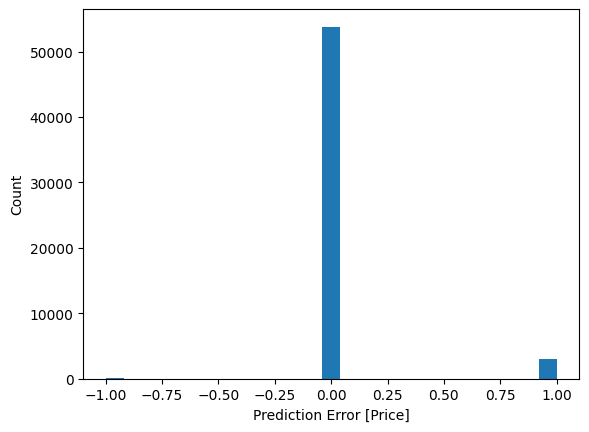

In [34]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")

<br>
<br>
<br>
<br>


# Deployment

### An extra step I do not miss is saving a model in TensorFlow Serving once completed

TensorFlow Serving is a tool that allows you to deploy and serve machine learning models in production. It provides a variety of features that make it easy to deploy models, including:

* A RESTful API for serving models
* Support for multiple programming languages
* A variety of serving options, including on-premise, cloud, and edge

To save a model in TensorFlow Serving, you can use the `tensorflow_serving.saved_model.save()` function. This function takes a `SavedModel` object as input and saves it to a specified location.

Once I have saved my model, I can easily deploy it using the TensorFlow Serving API.

In [35]:
import time

t = time.time()

export_path_sm = "./{}".format(int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

./1689385161


In [36]:
!ls {export_path_sm}

assets	fingerprint.pb	saved_model.pb	variables


## Reloading saved models

TensorFlow Serving allows to reload saved models without having to restart the server. This can be useful for updating models with new data or for debugging models.

In [37]:
DEFAULT_FUNCTION_KEY = "serving_default"
loaded = tf.saved_model.load(export_path_sm)
inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]

In [38]:
example_tf_batch = tf.convert_to_tensor(example_batch, dtype='float32')
example_result = inference_func(example_tf_batch)

example_result

{'dense_1': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>}

---

---

---
